In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import ssm
from ssm.util import find_permutation
from pathlib import Path
from scipy import io

npr.seed(0)
rng = npr.default_rng()

rnn_dirs = sorted(Path("../rnns/").iterdir())
import pandas as pd

N_iters = 300

In [2]:
def load_rnn(rnn_dirs, rnn_num):
    trial = io.loadmat(rnn_dirs[rnn_num * 2 - 1])
    return trial['test_out']

In [3]:
# model_choices = [(load_rnn(rnn_dirs, rnn_num)[:,:,-50:].mean(axis=2) > 0.5).astype(int).reshape(-1,1) for rnn_num in range(1,2)]
# model_choices = np.array(model_choices)
# model_choices.shape

In [4]:
def make_covariates(n_sessions = 5, n_trials = 200):

    bias = np.zeros((n_sessions, n_trials, 1))

    first_stimulus = np.array([[x]*50 for x in [1,1,0,0]] * n_sessions).reshape(n_sessions,-1,1)
    second_stimulus = np.array([[x]*50 for x in [0,0,1,1]] * n_sessions).reshape(n_sessions,-1,1)
    covariates = np.concatenate((first_stimulus, second_stimulus, bias), axis=2)
    return covariates

In [5]:
# train_choices = model_choices[:-1]
# train_covs = make_covariates(n_sessions=4, n_trials=200)

# test_choices = model_choices[-1].reshape(1,-1,1)
# test_covs = make_covariates(n_sessions=1, n_trials=200)

# train_choices.shape, train_covs.shape, test_choices.shape, test_covs.shape

In [6]:
data = load_rnn(rnn_dirs, 1)
data = data.reshape(-1,300)
data.shape

(200, 300)

In [7]:
data = data[:, :]
data.shape

(200, 300)

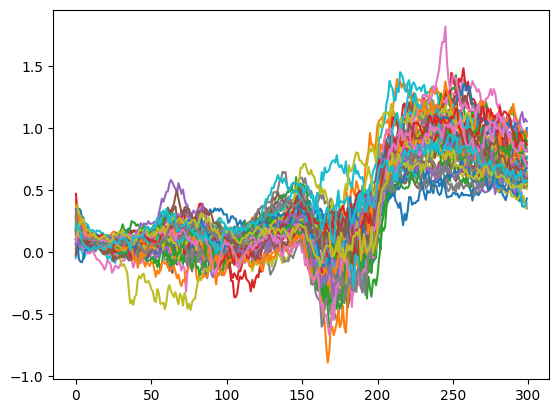

In [8]:
data_df = pd.DataFrame(data[0:50])
data_df.T.plot.line(legend=False)

In [9]:
obs = data[:, [49, 99, 149, 199, 249]]
obs.shape

(200, 5)

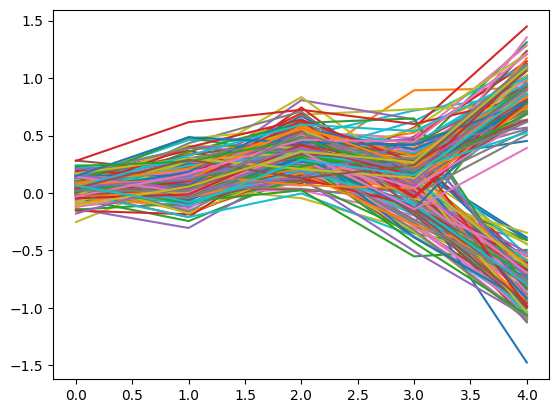

In [10]:
obs_df = pd.DataFrame(obs)
obs_df.T.plot(legend=False)

In [11]:
# round to nearst 0.5
obs = np.round(obs * 2) / 2

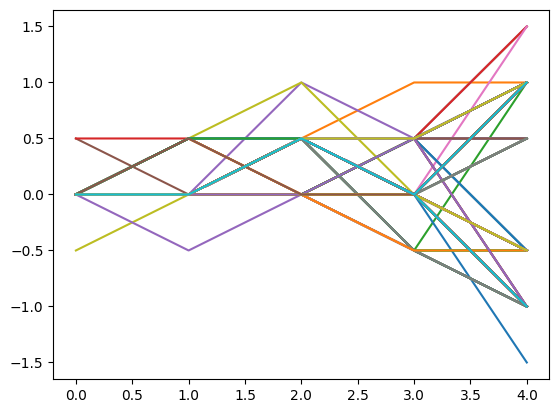

In [12]:
obs2_df = pd.DataFrame(obs)
obs2_df.T.plot(legend=False)

In [13]:
obs[obs > 1] = 1
obs[obs < -1] = -1

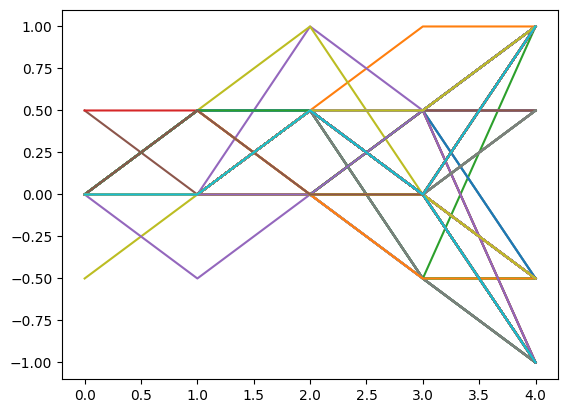

In [14]:
obs2_df = pd.DataFrame(obs)
obs2_df.T.plot(legend=False)

In [15]:
obs = obs * 2 + 2

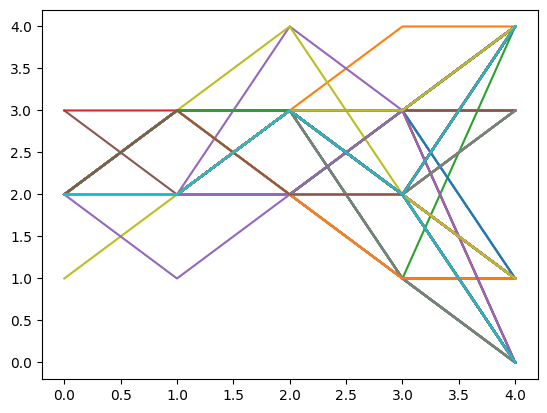

In [16]:
obs2_df = pd.DataFrame(obs)
obs2_df.T.plot(legend=False)

In [17]:
obs = obs.astype(int)

In [18]:
obs.shape

(200, 5)

In [19]:
covs = make_covariates(n_sessions=1, n_trials=200)
covs.shape

(1, 200, 3)

In [20]:
obs = obs.reshape(1, -1, 5)

In [21]:
obs.shape, covs.shape

((1, 200, 5), (1, 200, 3))

In [22]:
r_indexes = np.arange(200)
np.random.shuffle(r_indexes)

emissions = obs[:, r_indexes]
inputs = covs[:, r_indexes]

emissions.shape, inputs.shape

((1, 200, 5), (1, 200, 3))

inputs
1. lagged previous observation (cancelled)
2. first stimulus
3. second stimulus
4. bias

observations
1. value at time 50
2. value at time 100
3. value at time 150
4. value at time 200
5. value at time 250

In [24]:
# def train_hmm_mle(num_states, model_choices, covariates):

#     # Set the parameters of the GLM-HMM
#     num_states = num_states        # number of discrete states - state guess
#     obs_dim = 1           # number of observed dimensions (model choices output - single value) n_final layer output dimentions
#     num_categories = 2    # number of categories for output (binary model choice)
#     input_dim = 3         # input dimensions (first_stimulus, second_stimulus, bias)

#     # Make a GLM-HMM
#     mle_glmhmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs",
#                     observation_kwargs=dict(C=num_categories), transitions="standard")

    
#     ### CHECK THIS: BOTH CHOICES AND COVARIATES NEED TO LISTS OF NDARRAYS
#     # _ = mle_glmhmm.fit([x for x in model_choices], inputs=[x for x in covariates], method="em", num_iters=N_iters, tolerance = 1**-4)
#     _ = mle_glmhmm.fit([x for x in model_choices], inputs=[x for x in covariates], method="em", num_iters=N_iters)

#     return mle_glmhmm

In [25]:
def train_hmm(num_states, model_choices, covariates):
    num_categories = 4    # number of categories for output (binary model choice)
    # Now create a new HMM and fit it to the data with EM
    
    input_dim = 3
    obs_dim = 5
    hmm = ssm.HMM(num_states, obs_dim, input_dim, 
            observations="gaussian",
            transitions="inputdriven")
    
    # hmm = ssm.HMM(num_states, obs_dim, input_dim, 
    #         observations="categorical", observation_kwargs=dict(C=num_categories),
    #         transitions="inputdriven")

    # Fit
    hmm_lps = hmm.fit([x for x in model_choices], inputs=[x for x in covariates], method="em", num_iters=N_iters)

    return hmm

In [26]:
mle_hmms = []

for num_states in range(20):
    mle_hmms.append(train_hmm(num_states+1, emissions, inputs))

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [27]:
ll_mle = []
# ll_map = []

for model_idx in range(len(mle_hmms)):
    ll_mle.append(mle_hmms[model_idx].log_likelihood([x for x in emissions], inputs=[x for x in inputs]))
    # ll_map.append(map_hmms[model_idx].log_likelihood([x for x in test_choices], inputs=[x for x in test_covs]))

In [41]:
# df = pd.DataFrame({'mle':ll_mle})
# df

In [42]:
# ax = df.plot.bar(title='Validation Log Likelihoods', figsize=(10,6))
# ax.set_xlabel('Number of States')
# ax.set_ylabel('Log Likelihood')
# for p in ax.patches:
#     ax.annotate(f"{float(p.get_height()):0.0f}", (p.get_x() * 1.00, p.get_height() * 1.00))

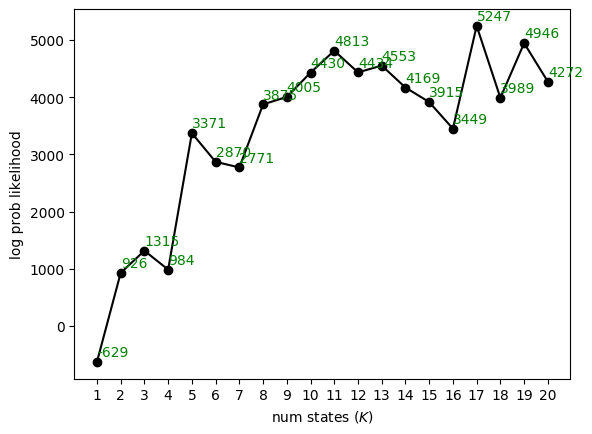

In [40]:
x = range(1, len(ll_mle)+1)
y = ll_mle
plt.plot(x, y, '-ko')
plt.xticks(x)
plt.xlabel("num states ($K$)")
plt.ylabel("log prob likelihood")
for a,b in zip(x, y): 
    plt.text(a, b + 100, str(int(b)), color="green")
plt.show()

In [31]:
def plot_recovery(num_states, glmhmm, suptitle, input_dim = 3):

    mle_weights = glmhmm.observations.params
    mle_log_trans_mat = glmhmm.transitions.params

    # Plot MLE parameters:
    fig = plt.figure(figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(1, 2, 1)
    cols = ['#ff7f00', '#4daf4a', '#377eb8', '#e41a1c', '#984ea3']
    for k in range(num_states):
        plt.plot(range(input_dim), mle_weights[k][0], marker='o',
                color=cols[k], linestyle='-',
                lw=1.5, label="state " + str(k+1))
    plt.yticks(fontsize=10)
    plt.ylabel("GLM weight", fontsize=15)
    plt.xlabel("covariate", fontsize=15)
    plt.xticks([0, 1, 2], ['first_stimulus', 'second_stimulus', 'bias'], fontsize=10, rotation=45)
    plt.axhline(y=0, color="k", alpha=0.5, ls="--")
    plt.legend()
    plt.title("Recovered weights", fontsize = 15)

    plt.subplot(1, 2, 2)
    gen_trans_mat = np.exp(mle_log_trans_mat)[0]
    plt.imshow(gen_trans_mat, vmin=-0.8, vmax=1, cmap='bone')
    for i in range(gen_trans_mat.shape[0]):
        for j in range(gen_trans_mat.shape[1]):
            text = plt.text(j, i, str(np.around(gen_trans_mat[i, j], decimals=2)), ha="center", va="center",
                            color="k", fontsize=12)
    plt.xlim(-0.5, num_states - 0.5)
    plt.xticks(range(0, num_states), (str(x) for x in range(1, num_states + 1)), fontsize=10)
    plt.yticks(range(0, num_states), (str(x) for x in range(1, num_states + 1)), fontsize=10)
    plt.ylim(num_states - 0.5, -0.5)
    plt.ylabel("state t", fontsize = 15)
    plt.xlabel("state t+1", fontsize = 15)
    plt.title("Recovered transition matrix", fontsize = 15)
    plt.suptitle(suptitle, y = 1.1, fontsize = 20)
    plt.show()

In [32]:
mle_hmms[3].observations.params[0].shape

(4, 5)

--------------------


ValueError: x and y must have same first dimension, but have shapes (3,) and (5,)

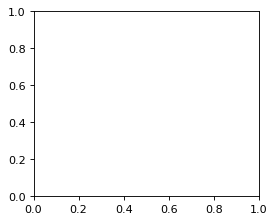

In [33]:
for idx in range(5):
    print("-"*20)
    plot_recovery(idx+1, mle_hmms[idx], f"MLE HMM with {idx+1} states")
    # plot_recovery(idx+1, map_hmms[idx], f"MAP HMM with {idx+1} states")

In [ ]:
def get_predictive_accuracy(hmm_model, test_choices, test_covs, class_considered = 1):
    # This function only works for binary observations
    # The idea is that we want to get the accurate probability for a specific class
    # - get the expected state probabilities for each trial
    # - multiply the expected state probabilities with the probability of the chosen (class) choice
    # - binarize and compare with actual choice to get accuracy

    expectations = [
        hmm_model.expected_states(data=data,
                                input=input)[0]
        for data, input in zip(test_choices, test_covs)
    ]

    # Flatten all trials across sessions into one long array
    posterior_probs = np.concatenate(expectations, axis=0)

    prob_right = [
        np.exp(hmm_model.observations.calculate_logits(input=input))
        for data, input,  in zip(test_choices, test_covs)
    ]
    # Flatten all trials across sessions into one long array
    prob_right = np.concatenate(prob_right, axis=0)

    # Seclect which class to calcualte the probability for: (here selected second class -> 1 positive)
    prob_right = prob_right[:, :, class_considered]

    # Now multiply posterior probs and prob_right and sum over latent axis:
    final_prob_right = np.sum(np.multiply(posterior_probs, prob_right), axis=1)

    # Get the predicted label for each time step:
    predicted_label = np.around(final_prob_right, decimals=0).astype('int')

    # See if the predicted label matches the actual label:
    predictive_acc = np.sum(test_choices.flatten() == predicted_label) / len(predicted_label)

    return predictive_acc

In [ ]:
acc_mle = []
acc_map = []

for model_idx in range(5):
    acc_mle.append(get_predictive_accuracy(mle_hmms[model_idx], emissions, inputs))
    # acc_map.append(get_predictive_accuracy(map_hmms[model_idx], test_choices, test_covs))

In [ ]:
acc_df = pd.DataFrame({'mle':acc_mle, 'map':acc_map}, index=range(1,6))
acc_df

In [ ]:
ax = acc_df.plot.bar(title='Predictive Accuracy for MLE and MAP')
ax.set_xlabel('Number of States')
ax.set_ylabel('Accuracy')
for p in ax.patches:
    ax.annotate(f"{float(p.get_height())}", (p.get_x() * 1.00, p.get_height() * 0.90), rotation=90)